In [3]:
import pandas as pd
import datetime as dt


In [4]:
files = ['cleaned_files/mortgage.csv','cleaned_files/immigration.csv','cleaned_files/house_price.csv']
dfs=[pd.read_csv(f,parse_dates=True)for f in files]

In [17]:
dfs[1]


,immigrants,date
0,18812.66667,2005-01
1,18812.66667,2005-02
2,18812.66667,2005-03
3,24823.66667,2005-04
4,24823.66667,2005-05
...,...,...
199,40970.33333,2021-08
200,40970.33333,2021-09
201,46063.33333,2021-10
202,46063.33333,2021-11


In [6]:
price_data =pd.merge(pd.merge(dfs[0],dfs[1],on='date'),dfs[2],on='date')
price_data

,Mortgage_Rate,date,immigrants,Composite_HPI_SA,Composite_Benchmark_SA
0,5.59,2005-02,18812.66667,100.6,222500
1,5.60,2005-03,18812.66667,101.4,224200
2,5.67,2005-04,24823.66667,102.2,225900
3,5.55,2005-05,24823.66667,102.8,227400
4,5.31,2005-06,24823.66667,103.8,229600
...,...,...,...,...,...
198,3.20,2021-08,40970.33333,326.5,721900
199,3.22,2021-09,40970.33333,333.9,738200
200,3.29,2021-10,46063.33333,343.5,759500
201,3.40,2021-11,46063.33333,351.4,777000


In [7]:
price_data['date'] = pd.to_datetime(price_data['date'])
df = price_data.set_index('date') 
df

,Mortgage_Rate,immigrants,Composite_HPI_SA,Composite_Benchmark_SA
date,,,,
2005-02-01,5.59,18812.66667,100.6,222500
2005-03-01,5.60,18812.66667,101.4,224200
2005-04-01,5.67,24823.66667,102.2,225900
2005-05-01,5.55,24823.66667,102.8,227400
2005-06-01,5.31,24823.66667,103.8,229600
...,...,...,...,...
2021-08-01,3.20,40970.33333,326.5,721900
2021-09-01,3.22,40970.33333,333.9,738200
2021-10-01,3.29,46063.33333,343.5,759500


In [8]:
df.head()

,Mortgage_Rate,immigrants,Composite_HPI_SA,Composite_Benchmark_SA
date,,,,
2005-02-01,5.59,18812.66667,100.6,222500
2005-03-01,5.60,18812.66667,101.4,224200
2005-04-01,5.67,24823.66667,102.2,225900
2005-05-01,5.55,24823.66667,102.8,227400
2005-06-01,5.31,24823.66667,103.8,229600


In [9]:
df.tail()

,Mortgage_Rate,immigrants,Composite_HPI_SA,Composite_Benchmark_SA
date,,,,
2021-08-01,3.20,40970.33333,326.5,721900
2021-09-01,3.22,40970.33333,333.9,738200
2021-10-01,3.29,46063.33333,343.5,759500
2021-11-01,3.40,46063.33333,351.4,777000
2021-12-01,3.45,46063.33333,357.5,790400


<AxesSubplot:xlabel='date'>

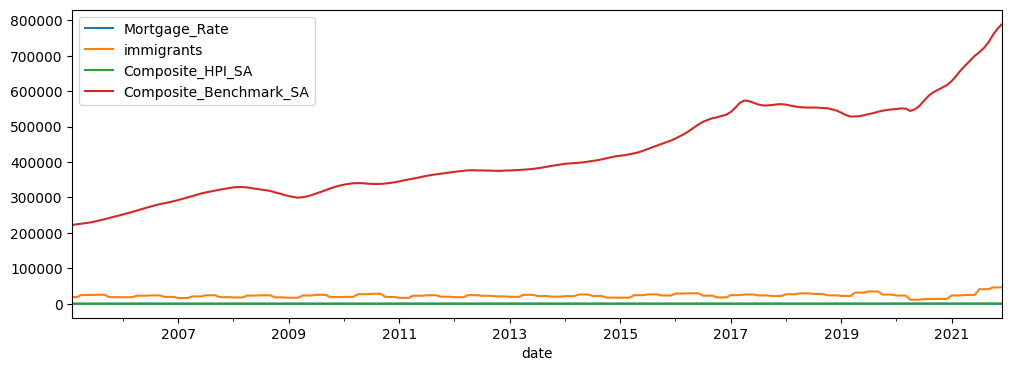

In [10]:
df.plot(figsize=(12,4))

<AxesSubplot:xlabel='date'>

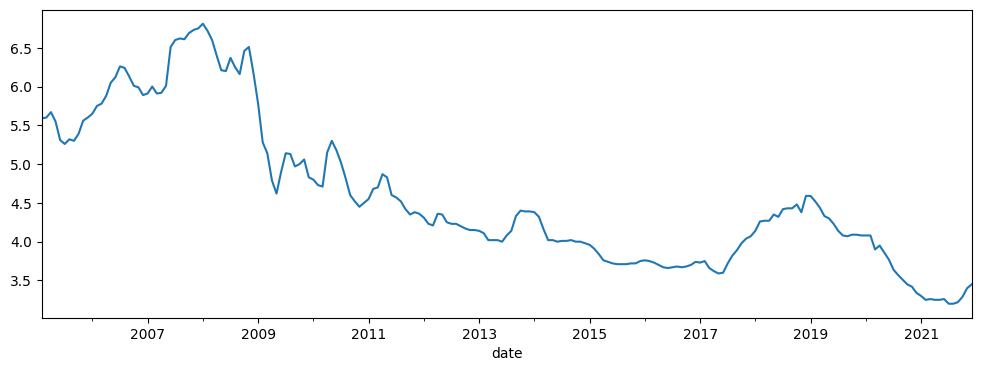

In [11]:
df['Mortgage_Rate'].plot(figsize=(12,4))

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df

,Mortgage_Rate,immigrants,Composite_HPI_SA,Composite_Benchmark_SA
date,,,,
2005-02-01,5.59,18812.66667,100.6,222500
2005-03-01,5.60,18812.66667,101.4,224200
2005-04-01,5.67,24823.66667,102.2,225900
2005-05-01,5.55,24823.66667,102.8,227400
2005-06-01,5.31,24823.66667,103.8,229600
...,...,...,...,...
2021-08-01,3.20,40970.33333,326.5,721900
2021-09-01,3.22,40970.33333,333.9,738200
2021-10-01,3.29,46063.33333,343.5,759500


<AxesSubplot:xlabel='date'>

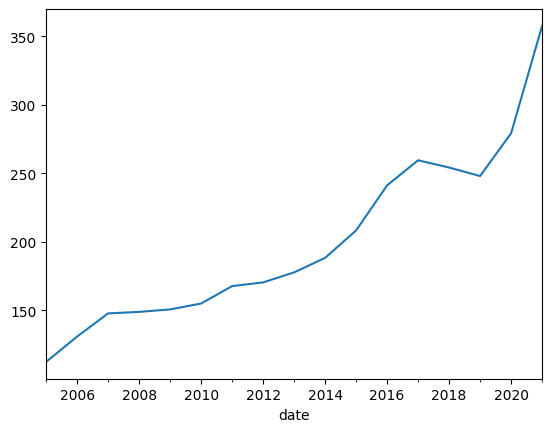

In [14]:
df.resample(rule='A').max()['Composite_HPI_SA'].plot()

In [15]:
#month and frequency
df.resample(rule='A').max()['Mortgage Rate'].plot()

KeyError: 'Mortgage Rate'

<AxesSubplot:xlabel='Date'>

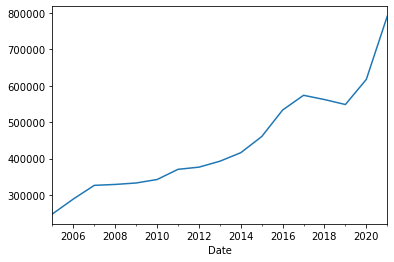

In [ ]:
df.resample(rule='A').max()['Composite_Benchmark_SA'].plot()

<AxesSubplot:xlabel='Date'>

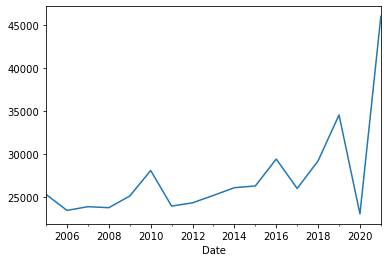

In [ ]:
df.resample(rule='A').max()['immigrants'].plot()

In [ ]:
df['immigrants'].rolling(5).mean().head(20)

Date
2005-01-01             NaN
2005-02-01             NaN
2005-03-01             NaN
2005-04-01             NaN
2005-05-01    21217.066667
2005-06-01    22419.266667
2005-07-01    23719.733333
2005-08-01    25020.200000
2005-09-01    25118.466667
2005-10-01    23846.133333
2005-11-01    22573.800000
2005-12-01    21203.200000
2006-01-01    19815.800000
2006-02-01    18428.400000
2006-03-01    18411.600000
2006-04-01    19246.466667
2006-05-01    20081.333333
2006-06-01    20933.000000
2006-07-01    21947.800000
2006-08-01    22962.600000
Name: immigrants, dtype: float64

,Mortgage_Rate,date
0,5.59,2005-02
1,5.60,2005-03
2,5.67,2005-04
3,5.55,2005-05
4,5.31,2005-06
...,...,...
198,3.20,2021-08
199,3.22,2021-09
200,3.29,2021-10
201,3.40,2021-11
